In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [2]:
df=pd.read_excel('driver.xlsx')

In [3]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


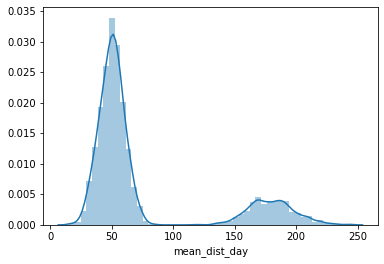

In [4]:
sns.distplot(df['mean_dist_day'])

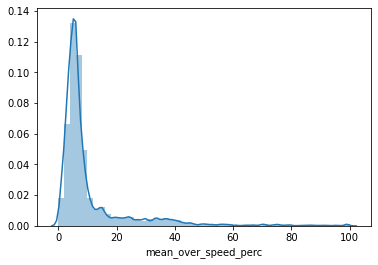

In [5]:
sns.distplot(df['mean_over_speed_perc'])

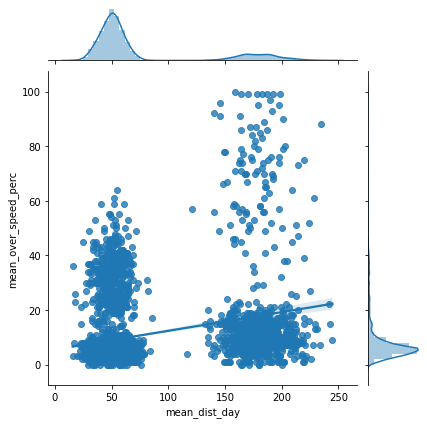

In [6]:
sns.jointplot(data=df,x='mean_dist_day',y='mean_over_speed_perc',kind='reg')

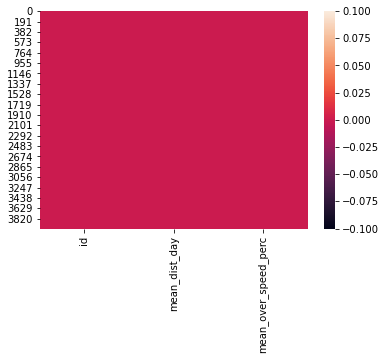

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [9]:
df.drop('id',axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_dist_day         4000 non-null   float64
 1   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 62.6 KB


In [11]:
np.corrcoef([df['mean_dist_day'],df['mean_over_speed_perc']])

array([[1.        , 0.26689676],
       [0.26689676, 1.        ]])

In [12]:
df['mean_dist_day'].corr(df['mean_over_speed_perc'])

0.2668967587681438

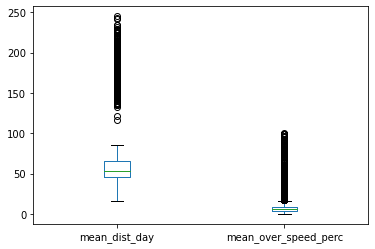

In [13]:
df.plot.box()

In [14]:
df[df['mean_dist_day']>100]

,mean_dist_day,mean_over_speed_perc
3200,179.22,95
3201,192.34,69
3202,140.25,92
3203,184.28,70
3204,200.58,50
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [15]:
kmeans=KMeans(n_clusters=6)

In [16]:
kmeans.fit(df)

KMeans(n_clusters=6)

In [17]:
kmeans.cluster_centers_

array([[ 57.82389271,   5.31843191],
       [165.80183562,  10.35616438],
       [196.42130564,  11.30860534],
       [ 41.48971768,   5.38930163],
       [176.55112245,  71.84693878],
       [ 50.578325  ,  33.1625    ]])

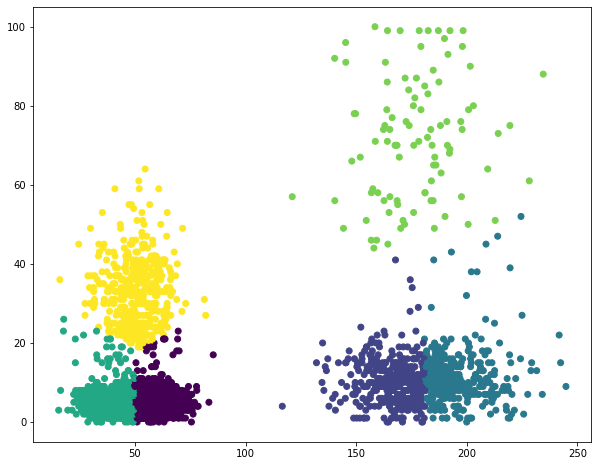

In [25]:
pl.figure(figsize=(10,8))
pl.scatter(df.iloc[:,0],df.iloc[:,1],c=kmeans.labels_)
pl.show()

In [21]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([1451,  370,  332, 1346,   98,  403], dtype=int64))

In [22]:
df['clusters']=kmeans.labels_

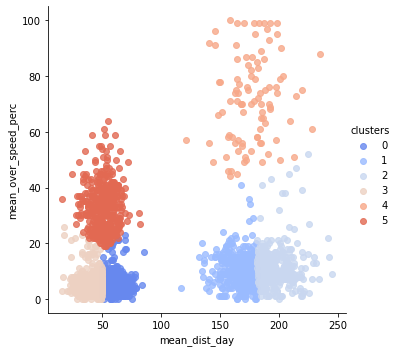

In [23]:
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df,fit_reg=False,
          palette='coolwarm',hue='clusters')

In [29]:
df.head()

,mean_dist_day,mean_over_speed_perc,clusters
0,71.24,28,5
1,52.53,25,5
2,64.54,27,5
3,55.69,22,5
4,54.58,25,5


(array([4.240e+02, 2.361e+03, 4.140e+02, 1.000e+00, 2.000e+00, 5.300e+01,
        2.920e+02, 3.260e+02, 1.120e+02, 1.500e+01]),
 array([ 15.52 ,  38.447,  61.374,  84.301, 107.228, 130.155, 153.082,
        176.009, 198.936, 221.863, 244.79 ]),
 <a list of 10 Patch objects>)

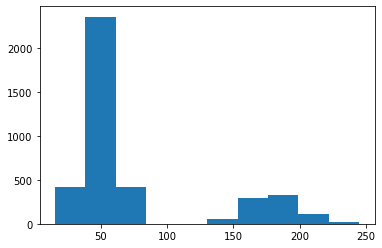

In [31]:
pl.hist(df['mean_dist_day'])

(array([3012.,  434.,  190.,  175.,   80.,   38.,   14.,   28.,   12.,
          17.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

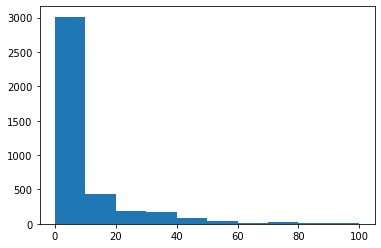

In [32]:
pl.hist(df['mean_over_speed_perc'])